In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [2]:
df_train = pd.read_csv("C:\\Users\\Aswin\\Janata Hack - AnalyticsVidhya 22-03-20\\train.csv")
df_test = pd.read_csv("C:\\Users\\Aswin\\Janata Hack - AnalyticsVidhya 22-03-20\\test.csv")
df_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [3]:
df_train.shape

(21000, 25)

In [4]:
df_train.info()
#No null values in any of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
ID                            21000 non-null int64
LIMIT_BAL                     21000 non-null int64
SEX                           21000 non-null int64
EDUCATION                     21000 non-null int64
MARRIAGE                      21000 non-null int64
AGE                           21000 non-null int64
PAY_0                         21000 non-null int64
PAY_2                         21000 non-null int64
PAY_3                         21000 non-null int64
PAY_4                         21000 non-null int64
PAY_5                         21000 non-null int64
PAY_6                         21000 non-null int64
BILL_AMT1                     21000 non-null int64
BILL_AMT2                     21000 non-null int64
BILL_AMT3                     21000 non-null int64
BILL_AMT4                     21000 non-null int64
BILL_AMT5                     21000 non-null int64
BILL_AMT6               

In [5]:
df_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,...,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,...,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,...,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,...,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,...,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


The percentage of non-default class : 0.78
The percentage of default class : 0.22


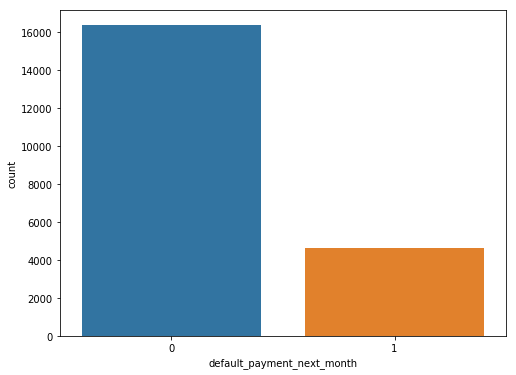

In [6]:
# let's look at the target percentage

plt.figure(figsize=(8,6))
sns.countplot(df_train['default_payment_next_month']);

print('The percentage of non-default class : %.2f' % (df_train['default_payment_next_month'].value_counts()[0] / len(df_train)))
print('The percentage of default class : %.2f' % (df_train['default_payment_next_month'].value_counts()[1] / len(df_train)))

#Hence, most of the people do not pay their money by default

In [7]:
df_train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

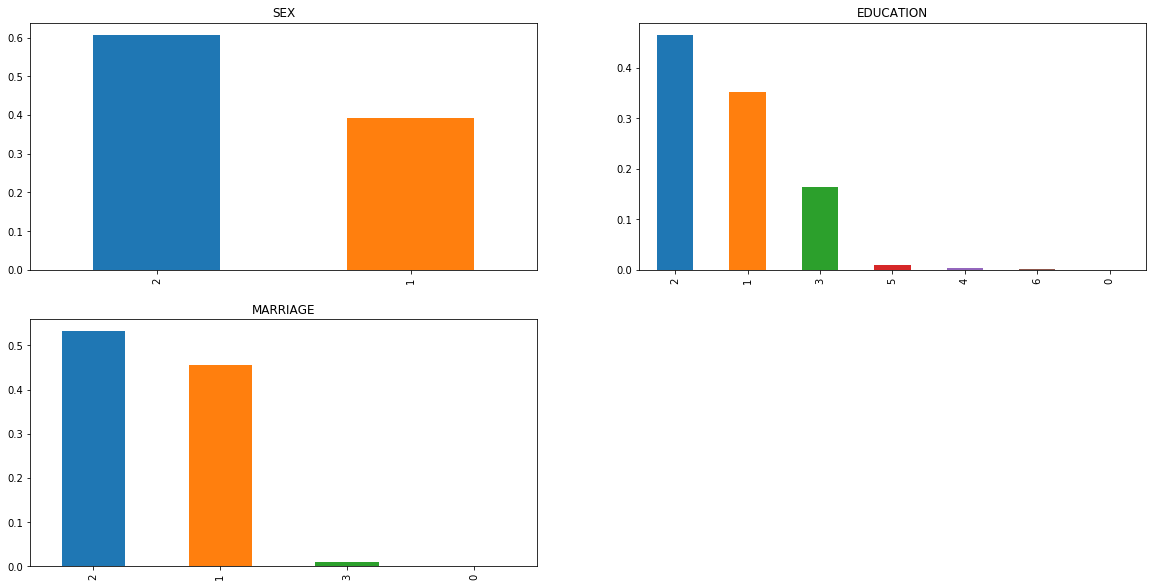

In [8]:
plt.figure(1)
plt.subplot(221) 
df_train['SEX'].value_counts(normalize=True).plot.bar(figsize = (20,10),title = 'SEX')
plt.subplot(222) 
df_train['EDUCATION'].value_counts(normalize=True).plot.bar(figsize = (20,10),title = 'EDUCATION')
plt.subplot(223) 
df_train['MARRIAGE'].value_counts(normalize=True).plot.bar(figsize = (20,10),title = 'MARRIAGE')
plt.show()

#60% applicants are Female and 40% Male
#Around 52% are Single, 46% are married and the rest divorced
#Around 47% of the applicants are university graduates, 35% are post grads, 17% are high school graduates and the rest are others

C:\Users\Aswin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


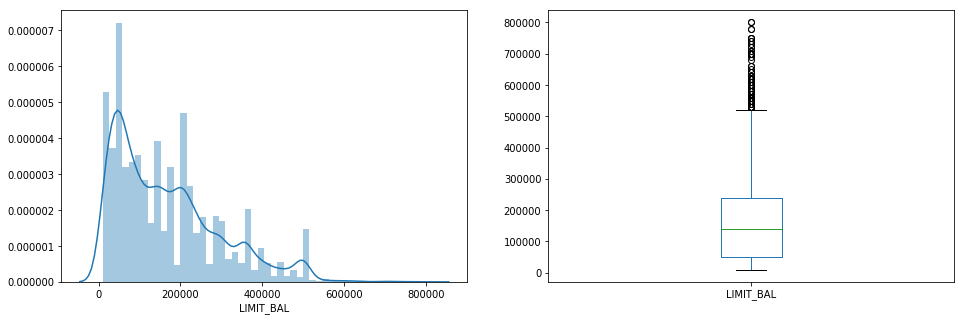

In [9]:
#Lets look at the amount of credit given
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train['LIMIT_BAL'])
plt.subplot(122)
df_train['LIMIT_BAL'].plot.box(figsize = (16,5))
plt.show()

#The distribution is sorta right skewed with a lot of outliers

In [10]:
X = df_train.drop("default_payment_next_month",1)
y = df_train['default_payment_next_month']

In [12]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [14]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(df_test))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(df_train):
        f_train = df_train.loc[train_fold] # Extract train data with cv indices
        f_valid = df_train.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['default_payment_next_month'], axis=1), 
                               y = f_train["default_payment_next_month"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['default_payment_next_month'], axis=1), 
                                y = f_valid["default_payment_next_month"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

Max Depth  Average Accuracy
        1          0.819667
        2          0.819095
        3          0.819714
        4          0.820857
        5          0.818048
        6          0.817571
        7          0.815667
        8          0.812667
        9          0.808667
       10          0.804095
       11          0.799857
       12          0.796333
       13          0.791381
       14          0.784571
       15          0.778857
       16          0.773619
       17          0.767857
       18          0.762048
       19          0.757810
       20          0.754619
       21          0.748571
       22          0.744571
       23          0.739333
       24          0.737048


In [15]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = df_train['default_payment_next_month']
x_train = df_train.drop(['default_payment_next_month'], axis=1).values 
x_test = df_test.values

# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)

In [16]:
acc = round(decision_tree.score(x_train, y_train), 2)
acc

0.82

In [18]:
subm = pd.read_csv("C:\\Users\\Aswin\\Janata Hack - AnalyticsVidhya 22-03-20\\sample_submission_gm6gE0l.csv")
subm['default_payment_next_month'] = y_pred
subm['ID'] = df_test['ID']

In [19]:
pd.DataFrame(subm, columns = ['ID', 'default_payment_next_month']).to_csv('logistic2.csv')